# Testando Outros Modelos Argentina

Neste notebook será testado outros modelo de séries temporais da Covid na Argentina, comparando os resultados com o modelo baseline feito na sprint 2.

In [ ]:
# Importando as Blibiotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

!pip install pmdarima
from pmdarima.arima import auto_arima

from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
serie_arg = pd.read_csv('Séries Temporais Argentina.csv')
serie_arg.drop('Unnamed: 0',axis=1,inplace=True)
serie_arg['Date'] = pd.to_datetime(serie_arg['Date'],format='%Y-%m-%d')
serie_arg['Mês'] = serie_arg['Date'].dt.month
serie_arg.head()

,Date,Confirmed,Recovered,Deaths,Ano,Mês
0,2020-01-22,0,0.0,0,2020,1
1,2020-01-23,0,0.0,0,2020,1
2,2020-01-24,0,0.0,0,2020,1
3,2020-01-25,0,0.0,0,2020,1
4,2020-01-26,0,0.0,0,2020,1


In [ ]:
serie_arg.set_index('Date',inplace=True)
serie_arg.head()

,Confirmed,Recovered,Deaths,Ano,Mês
Date,,,,,
2020-01-22,0,0.0,0,2020,1
2020-01-23,0,0.0,0,2020,1
2020-01-24,0,0.0,0,2020,1
2020-01-25,0,0.0,0,2020,1
2020-01-26,0,0.0,0,2020,1


In [ ]:
treino = serie_arg[(serie_arg['Ano']<=2021)&(serie_arg['Mês']<12)]
teste = serie_arg[(serie_arg['Ano']==2021)&(serie_arg['Mês'] == 12)]

In [ ]:
step1 = auto_arima(treino['Deaths'],start_p=1,start_q=1,max_p=6,max_q=6,m=12,start_P=0,seasonal=True,d=1,D=1,trace=True,
                    error_action='ignore',suppress_warnings=True,stepwise=False)

 ARIMA(0,1,0)(0,1,0)[12]             : AIC=9153.701, Time=0.11 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=8899.327, Time=0.81 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=8901.233, Time=2.66 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=8990.699, Time=0.25 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=8901.230, Time=1.33 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=inf, Time=7.54 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=8926.490, Time=1.09 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=7.62 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=inf, Time=8.39 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=9154.794, Time=0.23 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=8888.141, Time=1.85 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=8890.093, Time=6.12 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=8989.084, Time=0.61 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=8890.083, Time=3.99 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=8892.138, Time=5.55 sec
 ARIMA(0,1

In [ ]:
step2 = auto_arima(serie_arg['Deaths'],start_p=1,start_q=1,max_p=6,max_q=6,m=12,start_P=0,seasonal=True,d=1,D=1,trace=True,
                    error_action='ignore',suppress_warnings=True,stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=4.52 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=9418.940, Time=0.07 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=9246.806, Time=0.63 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=9177.693, Time=1.32 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=9408.786, Time=0.23 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=9178.674, Time=1.98 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=9178.485, Time=3.09 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=9247.671, Time=0.64 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=10.43 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=9224.276, Time=0.63 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=9168.928, Time=1.91 sec
 ARIMA(0,1,2)(0,1,0)[12]             : AIC=9407.481, Time=0.12 sec
 ARIMA(0,1,2)(1,1,1)[12]             : AIC=9169.749, Time=2.09 sec
 ARIMA(0,1,2)(0,1,2)[12]             : AIC=9169.670, Time=4.25 sec
 ARIMA(0,1,2)(1,1,0)[12]    

In [ ]:
step1.fit(treino['Deaths'])

ARIMA(order=(2, 1, 0), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [ ]:
step2.fit(treino['Deaths'])

ARIMA(order=(0, 1, 4), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [ ]:
future_forecast=step1.predict(n_periods=len(teste))

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
future_forecast1 = step2.predict(n_periods=len(teste))

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


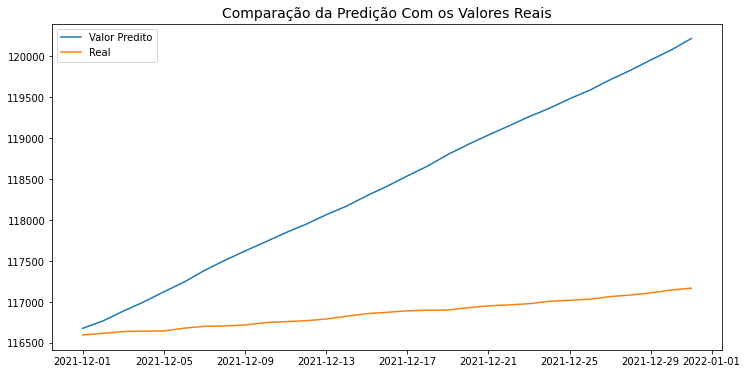

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Comparação da Predição Com os Valores Reais', fontsize=14)
plt.plot(teste.index,future_forecast,label='Valor Predito')
plt.plot(teste.index,teste['Deaths'].values,label='Real')
plt.legend()

In [ ]:
mae = mean_absolute_error(teste['Deaths'],future_forecast)
mape = mean_absolute_percentage_error(teste['Deaths'],future_forecast)
rmse = mean_squared_error(teste['Deaths'],future_forecast)

print('MAE:',mae)
print('MAPE:',mape)
print('RMSE:',np.sqrt(rmse))

MAE: 1566.5791892997738
MAPE: 0.013394544008283672
RMSE: 1800.8609480006116


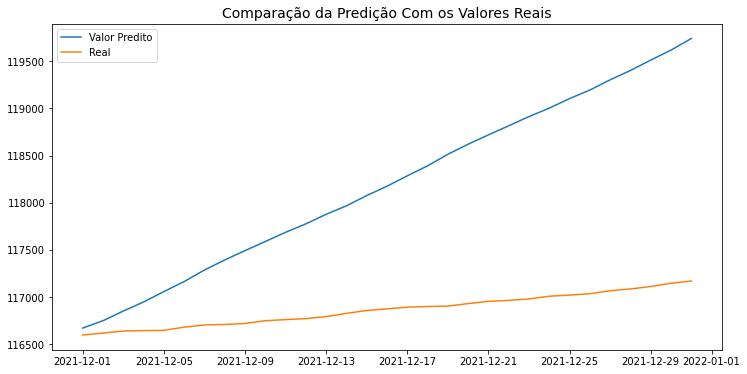

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Comparação da Predição Com os Valores Reais', fontsize=14)
plt.plot(teste.index,future_forecast1,label='Valor Predito')
plt.plot(teste.index,teste['Deaths'].values,label='Real')
plt.legend()

In [ ]:
mae = mean_absolute_error(teste['Deaths'],future_forecast1)
mape = mean_absolute_percentage_error(teste['Deaths'],future_forecast1)
rmse = mean_squared_error(teste['Deaths'],future_forecast1)

print('MAE:',mae)
print('MAPE:',mape)
print('RMSE:',np.sqrt(rmse))

MAE: 1327.1499845104515
MAPE: 0.011347435667855553
RMSE: 1523.4824505395177
